In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [312]:
# File name changed from zeta-disease_training-data to train.csv
# File name changed from zeta-disease_prediction-data to prediction.csv
train_data = pd.read_csv(os.getcwd() + '\\train.csv',index_col=False)
prediction_data = pd.read_csv(os.getcwd() + '\\prediction.csv',index_col=False)
train_data.shape,prediction_data.shape

((800, 9), (20, 9))

In [313]:
train_data.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [314]:
train_data.dtypes

age                     int64
weight                  int64
bmi                   float64
blood_pressure          int64
insulin_test            int64
liver_stress_test     float64
cardio_stress_test      int64
years_smoking           int64
zeta_disease            int64
dtype: object

In [315]:
# Checking imbalanced dataset or not
train_data['zeta_disease'].value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

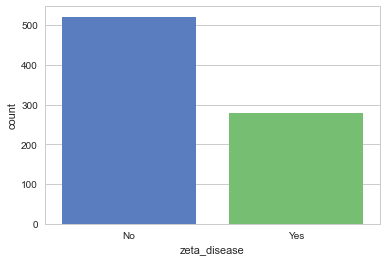

In [316]:
# visualize the target variable to check the imbalanced or not (Frequency)
g = sns.countplot(train_data['zeta_disease'])
g.set_xticklabels(['No','Yes'])
plt.show()

In [317]:
# Automated EDA
import sweetviz as sv
#analyzing the dataset
disease_report = sv.analyze(train_data)
#display the report
disease_report.show_html('Diseases.html')

:FEATURES DONE:                    |                     | [  0%]   00:10  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [82]:
train_data.head(5)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [320]:
# Include/Exclude zeta_disease column
X = train_data.iloc[:, 0:7].values
y = train_data.iloc[:, 8].values

In [319]:
from sklearn.model_selection import train_test_split

# Splitting Data Sets into Trainig and Test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(600, 7) (600,)
(200, 7) (200,)


# 1. Random Forest Classification 

In [321]:
#Building RandomForest model

from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=5, random_state=5)
Classifier.fit(X_train,y_train)
#y_pred = Classifier.predict(X_test)

RandomForestClassifier(n_estimators=5, random_state=5)

In [326]:
# Classifier.score(X_test,y_test)
y_pred = Classifier.predict(X_test)

In [342]:
print(classification_report(y_test,y_pred))
print("Random Forest Accuracy =",accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       129
           1       0.71      0.55      0.62        71

    accuracy                           0.76       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.75      0.76      0.75       200

Random Forest Accuracy = 76.0


In [338]:
pd.crosstab(y_test,y_pred, margins=True, margins_name="zeta_disease")

col_0,0,1,zeta_disease
row_0,,,
0,113,16,129
1,32,39,71
zeta_disease,145,55,200


# 2. SVC Model with default hyper param

In [348]:
# Building Support Vector Meachines Kernal=rbf

from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

y_pred_rbf = svclassifier.predict(X_test)

In [349]:
# print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print("SVC Accuracy(in %):",metrics.accuracy_score(y_test, y_pred_rbf)*100)

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       129
           1       0.81      0.49      0.61        71

    accuracy                           0.78       200
   macro avg       0.79      0.72      0.73       200
weighted avg       0.79      0.78      0.76       200

SVC Accuracy(in %): 78.0


# 3. MLP Classifer 

In [344]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [345]:
predictions = mlp.predict(X_test)

In [347]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Neural Network model accuracy(in %):", metrics.accuracy_score(y_test, predictions)*100)

[[117  12]
 [ 47  24]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       129
           1       0.67      0.34      0.45        71

    accuracy                           0.70       200
   macro avg       0.69      0.62      0.62       200
weighted avg       0.70      0.70      0.67       200

Neural Network model accuracy(in %): 70.5


# 4. KNN 

In [350]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [351]:
y_predknn = classifier.predict(X_test)

In [354]:
print(confusion_matrix(y_test, y_predknn))
print(classification_report(y_test, y_predknn))
# Model Accuracy, how often is the classifier correct?
print("KNN model accuracy(in %):",metrics.accuracy_score(y_test, y_predknn)*100)

[[119  10]
 [ 42  29]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       129
           1       0.74      0.41      0.53        71

    accuracy                           0.74       200
   macro avg       0.74      0.67      0.67       200
weighted avg       0.74      0.74      0.72       200

KNN model accuracy(in %): 74.0


In [356]:
train_data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.0,0.16,0.035,0.19,-0.034,0.042,-0.11,0.37,0.19
weight,0.16,1.0,0.21,0.12,0.3,0.15,0.054,0.1,0.47
bmi,0.035,0.21,1.0,0.24,0.22,0.12,0.26,0.029,0.27
blood_pressure,0.19,0.12,0.24,1.0,0.079,0.046,0.19,0.096,0.046
insulin_test,-0.034,0.3,0.22,0.079,1.0,0.18,0.42,-0.0063,0.13
liver_stress_test,0.042,0.15,0.12,0.046,0.18,1.0,0.17,0.022,0.18
cardio_stress_test,-0.11,0.054,0.26,0.19,0.42,0.17,1.0,-0.08,0.036
years_smoking,0.37,0.1,0.029,0.096,-0.0063,0.022,-0.08,1.0,0.2
zeta_disease,0.19,0.47,0.27,0.046,0.13,0.18,0.036,0.2,1.0


In [355]:
# split data train 75 % and test 25 %
x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size=0.25, random_state=123)

In [118]:
#Recursive feature elimination (RFE) with random forest
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [119]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['age', 'weight', 'bmi', 'insulin_test', 'zeta_disease'], dtype='object')


In [53]:
train_data.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [120]:
final_feat = train_data.drop(['cardio_stress_test', 'years_smoking'],axis=1)
final_feat.head(4)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,zeta_disease
0,54,189,27.1,80,0,1.5038,0
1,23,150,38.5,68,71,0.3868,0
2,47,186,29.9,90,0,0.2728,0
3,18,150,30.8,70,1033,0.6598,0


In [121]:
X_New = final_feat.iloc[:, 0:5].values
y_New = final_feat.iloc[:, 6].values

In [123]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


# Splitting Data Sets into Trainig and Test data sets
X_train, X_test, y_train, y_test = train_test_split(X_New,y_New, test_size=0.25,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(600, 5) (600,)
(200, 5) (200,)


In [124]:
# # Feature Scaling

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [125]:
# # Building Support Vector Meachines Kernal=rbf

# from sklearn.svm import SVC
# svclassifier = SVC(
#                     C=1.0,
#                     kernel='rbf',
#                     degree=3,
#                     gamma='scale',
#                     coef0=0.0,
#                     shrinking=True,
#                     probability=False,
#                     tol=0.001,
#                     cache_size=200,
#                     class_weight=None,
#                     verbose=False,
#                     max_iter=-1,
#                     decision_function_shape='ovr',
#                     break_ties=False,
#                     random_state=None,
#                     )
# svclassifier.fit(X_train, y_train)

# y_pred_rbf = svclassifier.predict(X_test)

# 5. Logistic Regression

In [371]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0,multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [372]:
log = model.predict(X_test)

In [373]:
print(confusion_matrix(y_test, log))
print(classification_report(y_test, log))
print("Logistic Regression model accuracy(in %)::",metrics.accuracy_score(y_test, log)*100)

[[122   7]
 [ 37  34]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       129
           1       0.83      0.48      0.61        71

    accuracy                           0.78       200
   macro avg       0.80      0.71      0.73       200
weighted avg       0.79      0.78      0.76       200

Logistic Regression model accuracy(in %):: 78.0


# 6. XG Boost Classifier

In [375]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [376]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [378]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("XG Boost Accuracy: %.2f%%" % (accuracy * 100.0))

XG Boost Accuracy: 79.00%


# Feature Selection with SVC 

In [379]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif

In [380]:
train_data.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [381]:
zeta_y= train_data["zeta_disease"]
zeta_x= train_data.drop(["zeta_disease"], axis=1)

In [382]:
#apply SelectKBest class to extract top 10 best features
X = zeta_x #independent columns
y = zeta_y    #target column i.e price range
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

           Specs        Score
4   insulin_test  2376.103323
1         weight  1049.672603
0            age   183.418070
2            bmi   134.027259
7  years_smoking   131.142971


In [383]:
chi_feat = train_data.drop(['cardio_stress_test', 'liver_stress_test','blood_pressure'],axis=1)
print(chi_feat.columns)

Index(['age', 'weight', 'bmi', 'insulin_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')


In [384]:
X_New = chi_feat.iloc[:, 0:4].values
y_New = chi_feat.iloc[:, 5].values

In [385]:
# Splitting Data Sets into Trainig and Test data sets
X_train, X_test, y_train, y_test = train_test_split(X_New,y_New, test_size=0.25,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(600, 4) (600,)
(200, 4) (200,)


In [386]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [390]:
# Building Support Vector Meachines Kernal=rbf

from sklearn.svm import SVC
svclassifier = SVC(
                    C=1.0,
                    kernel='rbf',
                    gamma='scale',
                    class_weight=None,
                    verbose=False,
                    max_iter=-1,
                    decision_function_shape='ovr',
                    break_ties=False,
                    random_state=None,
                    )
svclassifier.fit(X_train, y_train)

y_pred_rbf = svclassifier.predict(X_test)

In [393]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred_rbf))
# print(classification_report(y_test, y_pred_rbf))
print("SVC Accuracy with Chi Square: %.2f%%" % (metrics.accuracy_score(y_test, y_pred_rbf) * 100.0))

SVC Accuracy with Chi Square: 79.50%


In [394]:
#apply SelectKBest class to extract top 10 best features
X = zeta_x #independent columns
y = zeta_y    #target column i.e price range
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features
# featureScores.nlargest(12,'Score').to_excel(os.getcwd() + "//CallOut Prediction//NE//" + "f_classif"+ datetime.now().strftime("_%Y%m%d_%H_%M_%S") + '.xlsx',encoding='utf-8')

               Specs       Score
1             weight  227.689516
2                bmi   63.683287
7      years_smoking   31.631174
0                age   30.849898
5  liver_stress_test   28.196432


In [281]:
train_data.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [395]:
fclass_feat = train_data.drop(['cardio_stress_test','insulin_test','blood_pressure'],axis=1)
print(fclass_feat.columns)

Index(['age', 'weight', 'bmi', 'liver_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')


In [396]:
X_variables=fclass_feat.drop(['zeta_disease'], axis=1).columns
Y_variables='zeta_disease'

In [397]:
#Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(final_feat[X_variables],final_feat[Y_variables], test_size=0.25,random_state=123)

In [398]:
# Splitting Data Sets into Trainig and Test data sets
# X_train, X_test, y_train, y_test = train_test_split(X_New,y_New, test_size=0.25,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(600, 5) (600,)
(200, 5) (200,)


In [291]:
print(X_train.columns)
print(X_test.columns)

Index(['age', 'weight', 'bmi', 'liver_stress_test', 'years_smoking'], dtype='object')
Index(['age', 'weight', 'bmi', 'liver_stress_test', 'years_smoking'], dtype='object')


In [399]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [400]:
# Building Support Vector Meachines Kernal=rbf

from sklearn.svm import SVC
svclassifier = SVC(
                    C=1.0,
                    kernel='rbf',
                    gamma='scale',
                    class_weight=None,
                    verbose=False,
                    max_iter=-1,
                    decision_function_shape='ovr',
                    break_ties=False,
                    random_state=None,
                    )
svclassifier.fit(X_train, y_train)

y_pred_rbf = svclassifier.predict(X_test)

In [402]:
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print("SVC Accuracy with ANOVA: %.2f%%" % (metrics.accuracy_score(y_test, y_pred_rbf) * 100.0))

[[119  10]
 [ 30  41]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       129
           1       0.80      0.58      0.67        71

    accuracy                           0.80       200
   macro avg       0.80      0.75      0.76       200
weighted avg       0.80      0.80      0.79       200

SVC Accuracy with ANOVA: 80.00%


# Integrate prediction data

In [403]:
prediction_data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [404]:
# Drop features based on ANOVA feature selection
final_test = prediction_data.drop(['cardio_stress_test','insulin_test','blood_pressure','zeta_disease'],axis=1)
print(final_test.columns)

Index(['age', 'weight', 'bmi', 'liver_stress_test', 'years_smoking'], dtype='object')


In [405]:
X_test_pred = sc.transform(final_test)

In [406]:
y_pred_test = svclassifier.predict(X_test_pred)

In [407]:
prediction_data['zeta_disease']=y_pred_test

In [408]:
test_data.head(20)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,1
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,1
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,1
